In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
from stabilizer import *
import matplotlib.pyplot as plt

# Repition Code vs. No Code

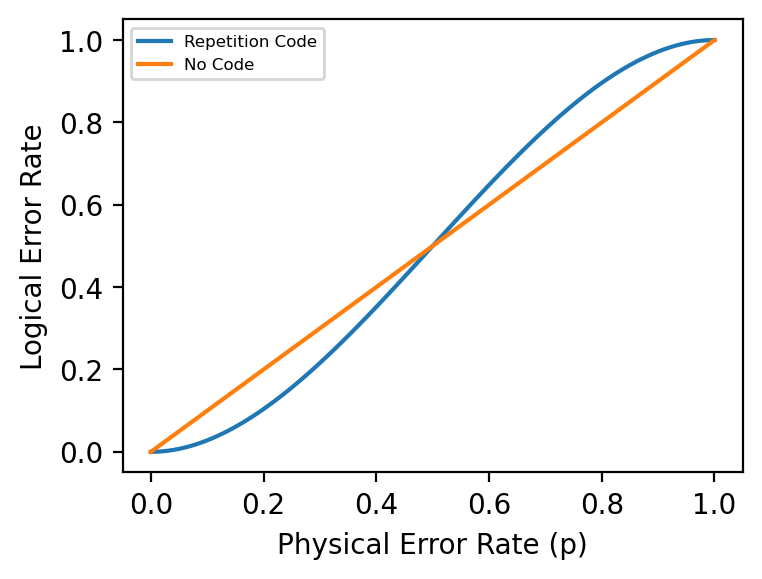

In [3]:
codes = {}
codes["Repetition Code"] = {"gates":[('CX', (0, 1)), ('CX', (0, 2))], "n": 3}
codes["No Code"] = {"gates":[], "n": 3}
run_code_analysis(codes, static=True)
plot_analysis(codes)

# Increasing Repetition Code Size

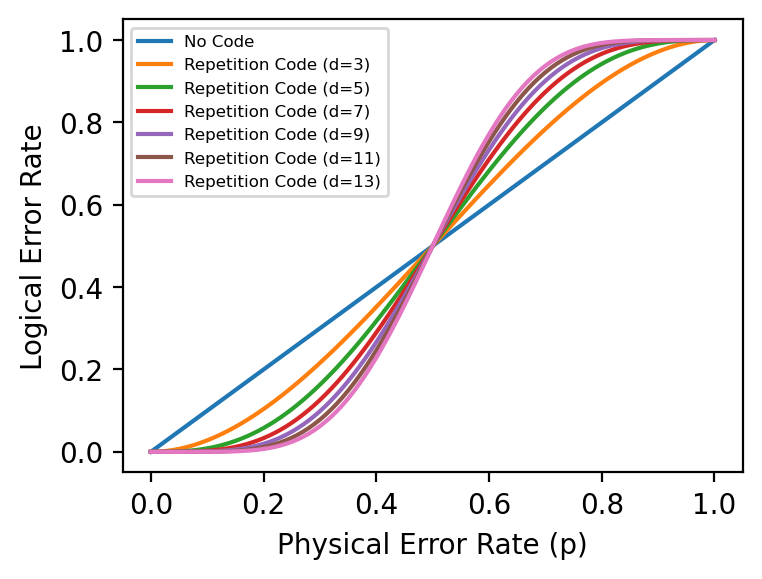

In [4]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
for d in [3,5,7,9,11,13]:
    codes[f"Repetition Code (d={d})"] = {"gates":repetition_code_gates(d), "n": d}

run_code_analysis(codes, static=True)
plot_analysis(codes)


# Random Code Exploration

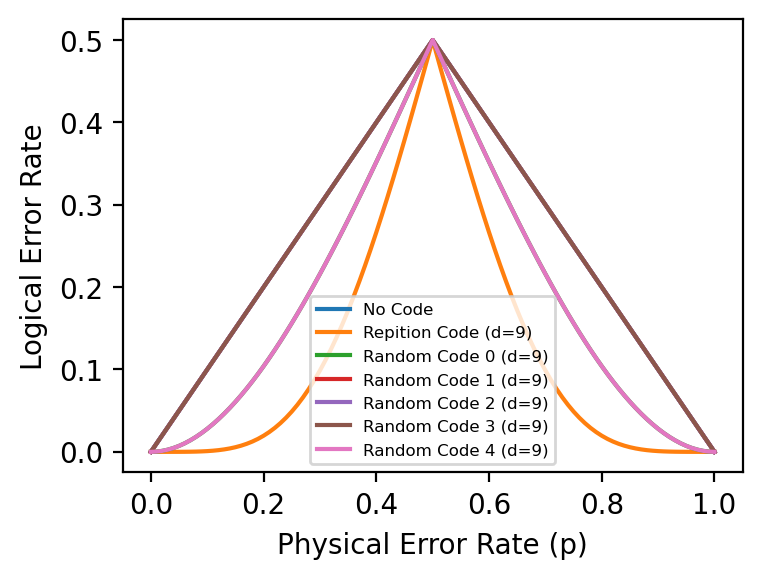

In [3]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
d = 9
num_gates = 9*2
codes[f"Repition Code (d={d})"] = {"gates":repetition_code_gates(d), "n": d}
for j in range(5):
    codes[f"Random Code {j} (d={d})"] = {"gates":gen_random_encoding(d,num_gates), "n": d}
    
run_code_analysis(codes)
plot_analysis(codes)

# Random Code Average Performance vs. Number of Encoding Gates

In [19]:
def calculate_distance(x1, y1, x2, y2):
    return np.average(y1-y2)

In [14]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
d = 5
codes[f"Repition Code (d={d})"] = {"gates":repetition_code_gates(d), "n": d}
num_gates_list = np.arange(2,d*3, 1)
num_random_points = 500
for num_gates in num_gates_list:
    for j in range(num_random_points):
        codes[(num_gates, j)] = {"gates":gen_random_encoding(d,num_gates), "n": d}
    
run_code_analysis(codes, static = False)


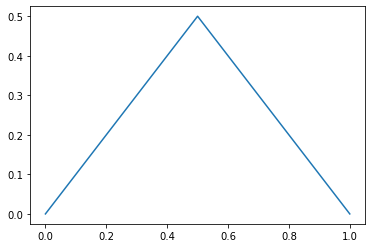

In [15]:
x = codes[(2,1)]["physical_error_probs"]
y = codes[(2,1)]["logical_error_probs"]

plt.plot(x,y)

In [20]:
average_performance = []
per_rep_code = codes[f"Repition Code (d={d})"]["physical_error_probs"]
ler_rep_code = codes[f"Repition Code (d={d})"]["logical_error_probs"]
for num_gates in num_gates_list:
    dist = 0
    for j in range(num_random_points):
        per_random_code_current = codes[(num_gates, j)]["physical_error_probs"]
        ler_random_code_current = codes[(num_gates, j)]["logical_error_probs"]
        dist += calculate_distance(per_random_code_current,ler_random_code_current, per_rep_code, ler_rep_code)
    dist = dist/num_random_points
    average_performance.append(dist)


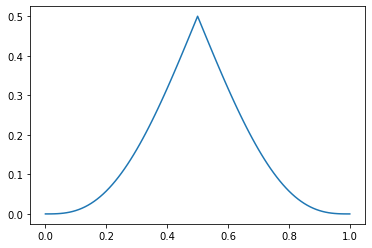

In [21]:
plt.plot(per_rep_code, ler_rep_code)

Text(0, 0.5, 'Average Distance\n from Repetition Code')

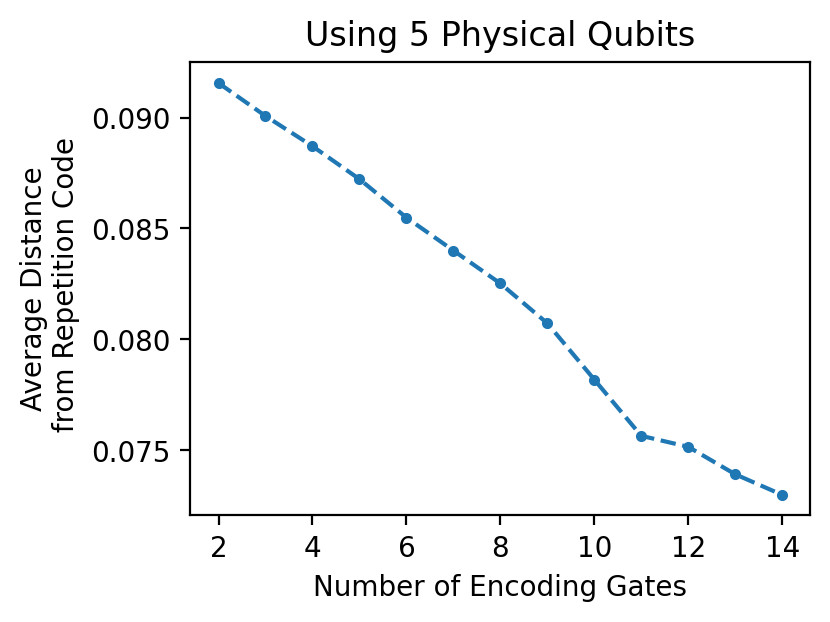

In [22]:
fig,ax = plt.subplots(1,1,dpi=200,figsize = (4,3))
ax.plot(num_gates_list, average_performance, ".--")
ax.set_title(f"Using {d} Physical Qubits")
ax.set_xlabel("Number of Encoding Gates")
ax.set_ylabel("Average Distance\n from Repetition Code")

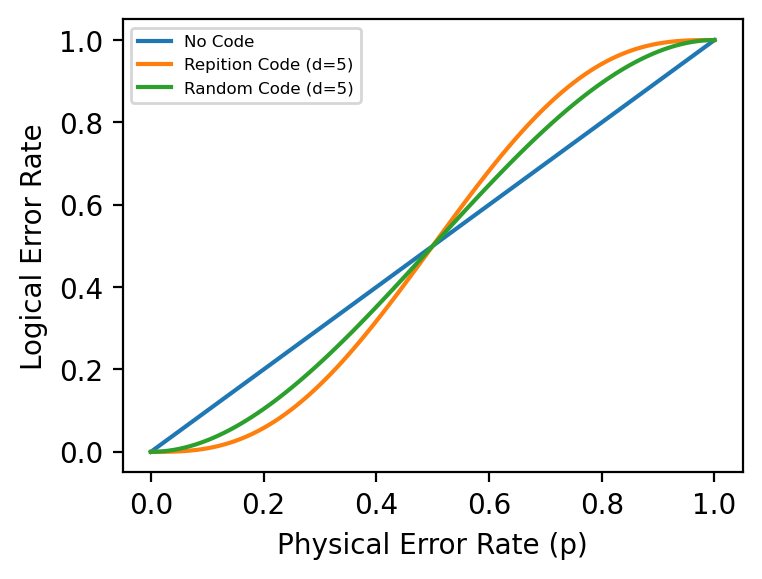

In [11]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
d = 5
num_gates = 10
codes[f"Repition Code (d={d})"] = {"gates":repetition_code_gates(d), "n": d}

codes[f"Random Code (d={d})"] = {"gates":[('CX', (0, 1)), ('CX', (1, 2)),('X', (0,))], "n": d}
    
run_code_analysis(codes, static=True)
plot_analysis(codes)